<a href="https://colab.research.google.com/github/makeshkrishna/Projects/blob/master/Baby_Names_1880-2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving names.zip to names.zip


In [0]:
import io
import zipfile

data = io.BytesIO(uploaded['names.zip'])  


In [0]:
!mkdir train

In [7]:
!unzip -q name.zip -d train/

unzip:  cannot find or open name.zip, name.zip.zip or name.zip.ZIP.


In [8]:
!unzip names.zip

Archive:  names.zip
  inflating: yob1880.txt             
  inflating: yob1881.txt             
  inflating: yob1882.txt             
  inflating: yob1883.txt             
  inflating: yob1884.txt             
  inflating: yob1885.txt             
  inflating: yob1886.txt             
  inflating: yob1887.txt             
  inflating: yob1888.txt             
  inflating: yob1889.txt             
  inflating: yob1890.txt             
  inflating: yob1891.txt             
  inflating: yob1892.txt             
  inflating: yob1893.txt             
  inflating: yob1894.txt             
  inflating: yob1895.txt             
  inflating: yob1896.txt             
  inflating: yob1897.txt             
  inflating: yob1898.txt             
  inflating: yob1899.txt             
  inflating: yob1900.txt             
  inflating: yob1901.txt             
  inflating: yob1902.txt             
  inflating: yob1903.txt             
  inflating: yob1904.txt             
  inflating: yob1905.txt      

In [0]:
import pandas as pd

In [0]:
names1880 = pd.read_csv('/content/yob1880.txt',names = ['name','sex','births'])

In [11]:
pwd

'/content'

In [12]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [0]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
  path = '/content/yob%d.txt' % year  
  frame = pd.read_csv(path, names=columns)
  frame['year'] = year  
  pieces.append(frame)
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [14]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692107,Zymaire,M,5,2010
1692108,Zyonne,M,5,2010
1692109,Zyquarius,M,5,2010
1692110,Zyran,M,5,2010


In [0]:
total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc =sum)

In [16]:
total_births.tail()

sex,F,M
year,,
2006,1899824,2053753
2007,1921053,2073784
2008,1889069,2038194
2009,1835062,1981481
2010,1775345,1916476


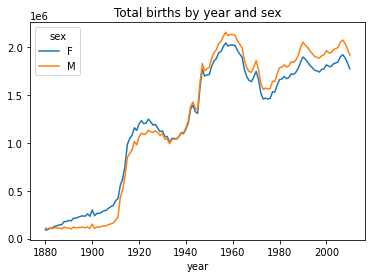

In [17]:
total_births.plot(title = 'Total births by year and sex')

In [0]:
def prop(group):
  group['prop'] = group.births/group.births.sum()
  return group
# Grouping sex and year and apply the above function
names = names.groupby(['year','sex']).apply(prop)

In [19]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692107,Zymaire,M,5,2010,0.000003
1692108,Zyonne,M,5,2010,0.000003
1692109,Zyquarius,M,5,2010,0.000003
1692110,Zyran,M,5,2010,0.000003


In [20]:
# The above prop operation will give the column sum of 1 within all group
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [0]:
# Top names of each sex/year
def get_top1000(group):
  return group.sort_values(by='births', ascending=False)[:1000]
  grouped = names.groupby(['year', 'sex'])
  top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
  top1000.reset_index(inplace=True, drop=True)
  return  top1000

In [0]:
# You can do it yourself without using any function
 
# we have to store the grouped values
pieces = []
for year, group in names.groupby(['year','sex']):
  pieces.append(group.sort_values(by = 'births', ascending = False)[:1000])
top1000 = pd.concat(pieces, ignore_index = True)

In [23]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102
261875,Joziah,M,196,2010,0.000102


In [0]:
# Lets analyse nameing trends

boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [25]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393
...,...,...,...,...,...
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102
261875,Joziah,M,196,2010,0.000102


In [26]:
girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260872,Aleigha,F,252,2010,0.000142
260873,Savanah,F,252,2010,0.000142
260874,Alaysia,F,252,2010,0.000142
260875,Dania,F,251,2010,0.000141


In [0]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name',aggfunc =sum)

In [28]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6872 entries, Aaden to Zuri
dtypes: float64(6872)
memory usage: 6.9 MB


In [0]:
# Let us plot the values
subset = total_births[['John','Harry','Mary','Marilyn']]

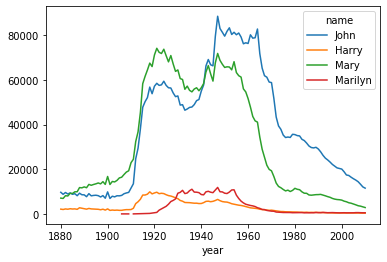

In [30]:
subset.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31036f89e8>,
      dtype=object)

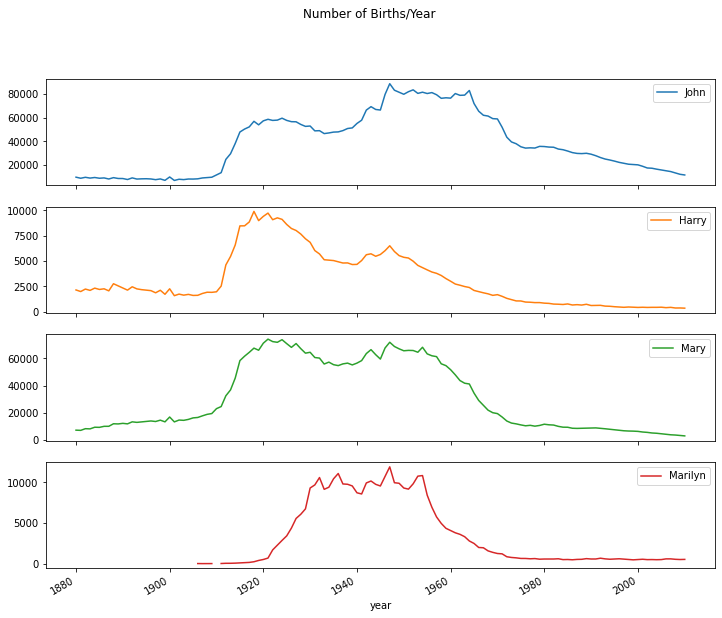

In [31]:
# Let us plot this graphs seperately
subset.plot(subplots = True, figsize = (12,10), grid = False, title = 'Number of Births/Year')

In [0]:
# Let us plot a curve which gives us a proportion of births represented by sex
table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)


In [33]:
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753049,0.860306
2007,0.745850,0.855081
2008,0.740824,0.849986


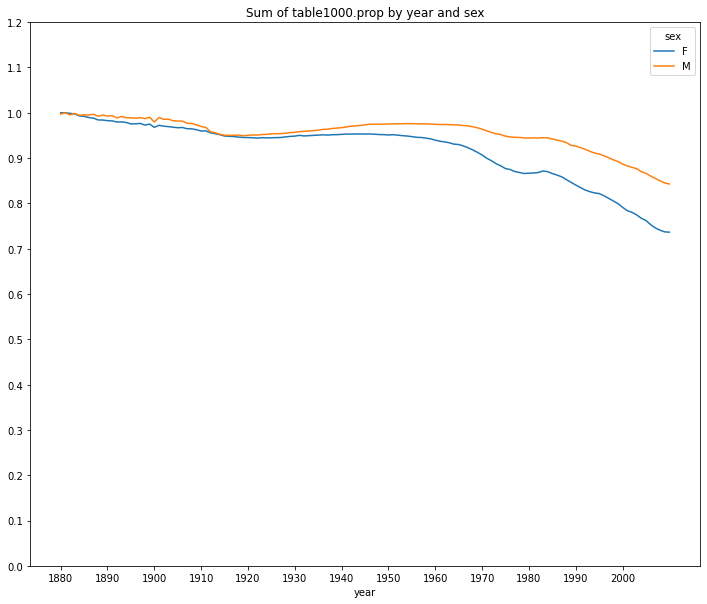

In [34]:
table.plot(title = 'Sum of table1000.prop by year and sex',figsize = (12,10), yticks = np.linspace (0,1.2,13), xticks = range(1880,2010,10) )

In [0]:
df = boys[boys.year == 2010]

In [36]:
df # Return top 1000 name 

,name,sex,births,year,prop
260877,Jacob,M,22127,2010,0.011546
260878,Ethan,M,18002,2010,0.009393
260879,Michael,M,17350,2010,0.009053
260880,Jayden,M,17179,2010,0.008964
260881,William,M,17051,2010,0.008897
...,...,...,...,...,...
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102
261875,Joziah,M,196,2010,0.000102


In [0]:
"""To get the most popular names it takes to reach 50% we could use a for loop 
to do this, but in numpy we have a clever method to do it. i.e. cumsum"""

prop_sum = df.sort_values(by = 'prop' , ascending= False).prop.cumsum()

In [38]:
prop_sum.shape

(1000,)

In [39]:
prop_sum.values.searchsorted(0.5)

116

In [0]:
# Let us make a function which get all the value wrt year
# Which return 50 percent of the top values
def prop_sum_year(year_,num):
  df = boys[boys.year == year_]
  prop_sum = df.sort_values(by = 'prop' , ascending= False).prop.cumsum()
  # As array starts with 0 we add 1 to get the total
  return (prop_sum.values.searchsorted(num) + 1)

In [41]:
prop_sum_year(1880,0.5)

14

In [42]:
prop_sum_year(1997 ,0.9) # Returns 90 percent of the total values

986

In [0]:
def prop_sum_year_girls(girls_year):
  df = girls[girls.year == girls_year]
  prop_sum = df.sort_values(by = 'prop' , ascending= False).prop.cumsum()
  return (prop_sum.values.searchsorted(0.5) + 1)

In [44]:
prop_sum_year_girls(2010)

246

In [0]:
# We could do the same operation by
def get_quantile_sum(group,num = 0.6):
  group = group.sort_values(by = 'prop',ascending = False)
  return group.prop.cumsum().values.searchsorted(num) +1

In [46]:
get_quantile_sum(group,0.7)

334

In [0]:
# Using the apply
change = top1000.groupby(['year','sex']).apply(get_quantile_sum)


In [48]:
change

year  sex
1880  F       53
      M       25
1881  F       53
      M       26
1882  F       54
            ... 
2008  M      178
2009  F      424
      M      187
2010  F      427
      M      191
Length: 262, dtype: int64

In [0]:
# Let us unstack
change = change.unstack('sex')

In [50]:
change

sex,F,M
year,,
1880,53,25
1881,53,26
1882,54,27
1883,55,27
1884,56,30
...,...,...
2006,370,161
2007,394,169
2008,412,178


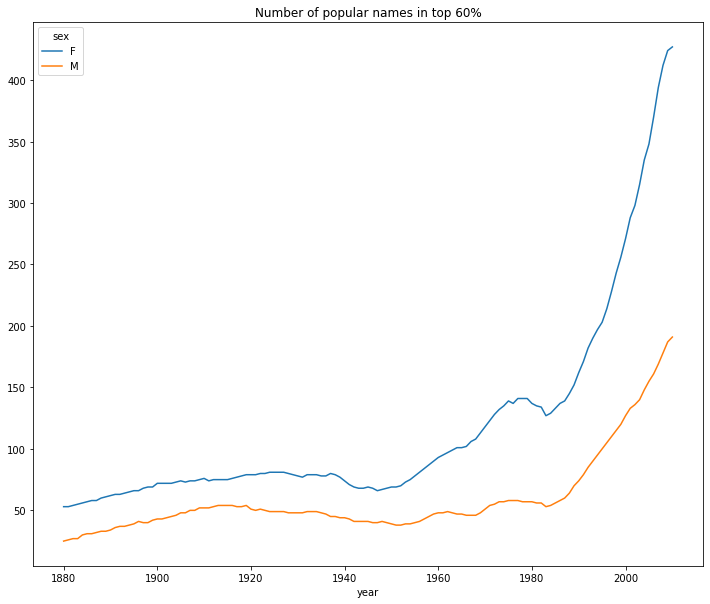

In [51]:
#let us plot this 
change.plot(title = 'Number of popular names in top 60%' , figsize = (12,10))

In [0]:
# Lets explore the last letter revolution
# This is from a researcher Laura Watternberg which was pointed out in her website

get_last_char = lambda x : x[-1]
last_char = names.name.map(get_last_char)
last_char.name = 'Last_character'

In [0]:
table = names.pivot_table('births',index = last_char,columns =['sex','year'],aggfunc =sum )

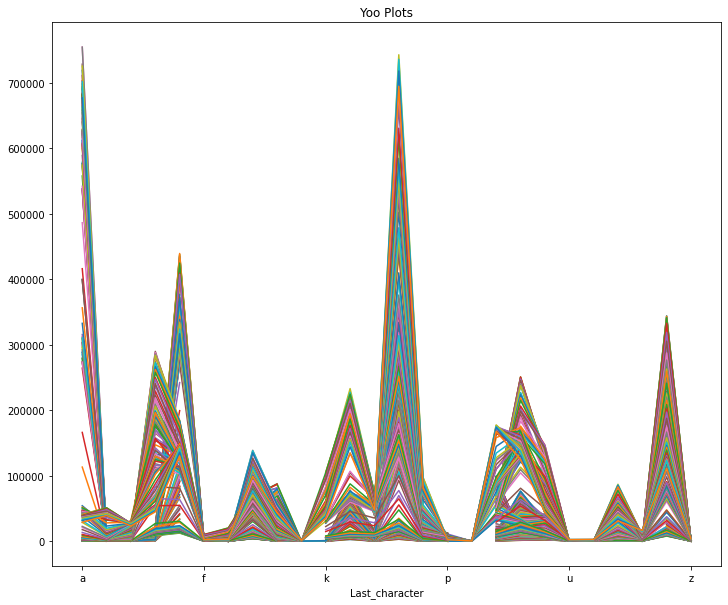

In [54]:
table[:1000].plot(title = 'Yoo Plots',figsize = (12,10 ),legend=None)
# This is beautiful but it is useless

In [55]:
# Now we know that why did it give a problem
# There are too much of data
table

sex                   F                    ...         M                    
year               1880     1881     1882  ...      2008      2009      2010
Last_character                             ...                              
a               31446.0  31581.0  36536.0  ...   33029.0   31628.0   28868.0
b                   NaN      NaN      NaN  ...   40084.0   39091.0   39276.0
c                   NaN      NaN      5.0  ...   25393.0   24155.0   23348.0
d                 609.0    607.0    734.0  ...   48074.0   46360.0   44828.0
e               33381.0  34080.0  40399.0  ...  141360.0  136018.0  130253.0
f                   NaN      NaN      NaN  ...    2199.0    2215.0    2312.0
g                   7.0      5.0     12.0  ...    2067.0    2401.0    2696.0
h                4863.0   4783.0   5566.0  ...  100693.0  100564.0   99303.0
i                  61.0     78.0     81.0  ...   38273.0   41112.0   43447.0
j                   NaN      NaN      NaN  ...    1384.0    1422.0    1479.0
k                  13.0     15.0     11.0  ...   39684.0   37655.0   35518.0
l                2541.0   2910.0   3527.0  ...  151274.0  144362.0  135029.0
m                  58.0     57.0     81.0  ...   44436.0   46477.0   47349.0
n                3008.0   2959.0   3575.0  ...  735842.0  718156.0  694587.0
o                  30.0     49.0     35.0  ...   91659.0   86636.0   81580.0
p                   NaN      NaN      NaN  ...    2657.0    2605.0    2431.0
q                   NaN      NaN      NaN  ...     339.0     377.0     345.0
r                 481.0    417.0    590.0  ...  175073.0  173814.0  167498.0
s                1391.0   1316.0   1637.0  ...  137464.0  130410.0  124871.0
t                2152.0   2165.0   2399.0  ...   43955.0   43831.0   43812.0
u                 380.0    427.0    410.0  ...    2416.0    2430.0    2354.0
v                   NaN      NaN      NaN  ...    2423.0    2597.0    2777.0
w                   NaN      5.0      NaN  ...   37047.0   33365.0   31012.0
x                   NaN      NaN      NaN  ...   14864.0   16700.0   16475.0
y               10467.0  10404.0  12143.0  ...  123015.0  113451.0  111524.0
z                 106.0     95.0    106.0  ...    3490.0    3649.0    3504.0

[26 rows x 262 columns]

In [0]:
# So lets seperate them year wise
sub_table = table.reindex(columns= [1910,1960,2010],level = 'year')

In [57]:
sub_table.head()

sex                    F                            M                    
year                1910      1960      2010     1910      1960      2010
Last_character                                                           
a               108399.0  691261.0  676865.0    977.0    5212.0   28868.0
b                    NaN     694.0     455.0    411.0    3912.0   39276.0
c                    5.0      49.0     956.0    482.0   15454.0   23348.0
d                 6751.0    3731.0    2642.0  22113.0  262116.0   44828.0
e               133601.0  435030.0  316764.0  28665.0  178768.0  130253.0

In [58]:
sub_table.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2010    1775345.0
M    1910     194212.0
     1960    2132155.0
     2010    1916476.0
dtype: float64